In [1]:
from env import *
from fonctions import *
import numpy as np
import gurobipy as gp
from gurobipy import GRB

### Test generator

In [2]:
env = Env(10,10,0.6,0.2,[0.1,0.2,0.3,0.4])

In [3]:
cases=env.reset()

In [4]:
cases[:,:,0]

array([[3, 4, 3, 3, 0, 0, 0, 0, 0, 2],
       [2, 4, 4, 3, 3, 4, 0, 4, 4, 4],
       [3, 4, 2, 1, 0, 4, 2, 4, 2, 3],
       [3, 0, 3, 0, 4, 0, 3, 4, 4, 3],
       [4, 2, 4, 0, 4, 0, 3, 4, 3, 4],
       [0, 4, 1, 2, 0, 3, 4, 1, 4, 0],
       [4, 2, 1, 3, 2, 2, 4, 3, 0, 2],
       [4, 4, 4, 2, 1, 0, 2, 1, 2, 2],
       [2, 4, 4, 0, 4, 0, 3, 3, 3, 3],
       [0, 4, 4, 3, 3, 0, 4, 3, 3, 1]])

In [5]:
env.reward

array([[  -3,   -4,   -3,   -3,    0,    0,    0,    0,    0,   -2],
       [  -2,   -4,   -4,   -3,   -3,   -4,    0,   -4,   -4,   -4],
       [  -3,   -4,   -2,   -1,    0,   -4,   -2,   -4,   -2,   -3],
       [  -3,    0,   -3,    0,   -4,    0,   -3,   -4,   -4,   -3],
       [  -4,   -2,   -4,    0,   -4,    0,   -3,   -4,   -3,   -4],
       [   0,   -4,   -1,   -2,    0,   -3,   -4,   -1,   -4,    0],
       [  -4,   -2,   -1,   -3,   -2,   -2,   -4,   -3,    0,   -2],
       [  -4,   -4,   -4,   -2,   -1,    0,   -2,   -1,   -2,   -2],
       [  -2,   -4,   -4,    0,   -4,    0,   -3,   -3,   -3,   -3],
       [   0,   -4,   -4,   -3,   -3,    0,   -4,   -3,   -3, 1000]])

### Test value iteration

In [6]:
nb,v,policy=value_iteration(env,0.9,problem="equilibre")

In [7]:
dict_action={0:"O",1:"S",2:"W",3:"E"}

In [8]:
policy

array([[3., 3., 3., 1., 0., 0., 0., 0., 0., 1.],
       [1., 3., 3., 3., 3., 1., 0., 1., 1., 1.],
       [1., 3., 1., 0., 0., 3., 1., 1., 1., 1.],
       [1., 0., 1., 0., 1., 0., 1., 1., 1., 1.],
       [3., 1., 1., 0., 1., 0., 1., 1., 1., 2.],
       [0., 3., 3., 1., 0., 3., 1., 1., 2., 0.],
       [3., 3., 3., 3., 3., 3., 1., 1., 0., 1.],
       [3., 3., 3., 3., 0., 0., 1., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 3., 3., 1., 1.],
       [0., 3., 0., 3., 0., 0., 3., 3., 3., 0.]])

### Test visualisation de politique - avec tables des values

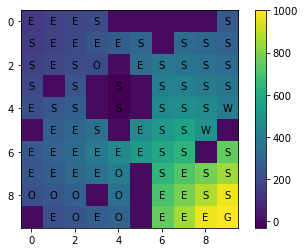

In [10]:
visu_policy(v,policy,dict_action,cases)

### Test programme lineaire de politique mixte

In [11]:
p,v2=dual_pl_mono(env,0.9)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-01-25
Using license file /home/yuhan/gurobi.lic


In [12]:
pn=normalise(p)

In [13]:
pd=get_a_policy(pn)

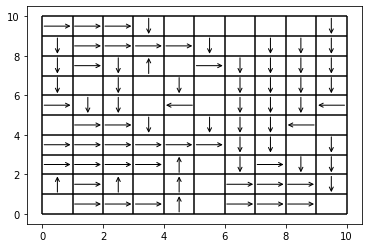

In [15]:
visu_policy_plt(pd,env)

### Test MOMDP

In [16]:
v,policy=minmax_policy(env,gamma=0.99)

Gurobi Optimizer version 9.1.1 build v9.1.1rc0 (linux64)
Thread count: 1 physical cores, 1 logical processors, using up to 1 threads
Optimize a model with 1330 rows, 401 columns and 2632 nonzeros
Model fingerprint: 0xbf525fc4
Coefficient statistics:
  Matrix range     [1e-02, 9e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1248 rows and 117 columns
Presolve time: 0.02s
Presolved: 82 rows, 284 columns, 1326 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.546326e+03   0.000000e+00      0s
     218    1.0502275e+03   0.000000e+00   0.000000e+00      0s

Solved in 218 iterations and 0.04 seconds
Optimal objective  1.050227490e+03


In [17]:
pd=get_a_policy(pn)

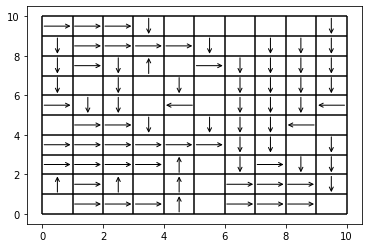

In [18]:
visu_policy_plt(pd,env)